In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
#carregando os dados

dadosTreino=pd.read_csv("./train.csv")

dadosTreino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dadosTreino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
'''dados que podem ter relação com a sobrevivencia - Survived, Pclass (classe 1  
teve mais chance de sobrevivencia que classe 3?), Sexo, Age, numero de irmãos
e parch - pais e filhos a bordo. Fare ticket pode ter relação com a classe'''

'dados que podem ter relação com a sobrevivencia - Survived, Pclass (classe 1  \nteve mais chance de sobrevivencia que classe 3?), Sexo, Age, numero de irmãos\ne parch - pais e filhos a bordo. Fare ticket pode ter relação com a classe'

In [7]:
#quantos sobreviveram?
print(dadosTreino.Survived.value_counts())


0    549
1    342
Name: Survived, dtype: int64


In [8]:
#Estatistica sobre a idade das pessoas
dadosTreino["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
#Estatistica sobre sexo
dadosTreino["Sex"].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [10]:
filtro = dadosTreino["Sex"] == 'male'
dadosTreino[["Survived", "Sex"]][filtro].head(10)

,Survived,Sex
0,0,male
4,0,male
5,0,male
6,0,male
7,0,male
12,0,male
13,0,male
16,0,male
17,1,male
20,0,male


In [26]:
#quantos homens sobreviveram??
men = dadosTreino[["Survived", "Sex"]][filtro]
#81% dos homens não sobreviveram 

menSurvived = mens[mens["Survived"] == 1]

print(" {}% dos homens sobreviveram ao titanic".format(round(len(mensSurvived)/len(men) * 100), 2))
print(" {}% dos homens NÃO sobreviveram ao titanic".format(round(100 - (len(mensSurvived)/len(men) * 100)), 2))

 19% dos homens sobreviveram ao titanic
 81% dos homens NÃO sobreviveram ao titanic


In [27]:
# quantas mulheres sobreviveram??
filtro2 = dadosTreino["Sex"] == 'female'

women = dadosTreino[["Survived", "Sex"]][filtro2]
womenSurvived = women[women.Survived == 1]

print(" {}% das mulheres sobreviveram ao titanic".format(round(len(womenSurvived)/len(women) * 100), 2))
print(" {}% das mulheres NÃO sobreviveram ao titanic".format(round(100 - (len(womenSurvived)/len(women) * 100)), 2))

 74% das mulheres sobreviveram ao titanic
 26% das mulheres NÃO sobreviveram ao titanic


[Text(0, 0, 'Sim'), Text(1, 0, 'Não')]

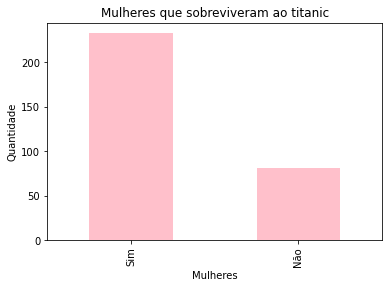

In [24]:
g2 = dadosTreino[["Survived", "Sex"]][filtro2].value_counts().plot(kind="bar", color="pink")
plt.title("Mulheres que sobreviveram ao titanic")
plt.xlabel("Mulheres")
plt.ylabel("Quantidade")

#Mudando os labels do gráfico
labels = [item.get_text() for item in g2.get_xticklabels()]
labels[0] = "Sim"
labels[1] = "Não"
g2.set_xticklabels(labels)

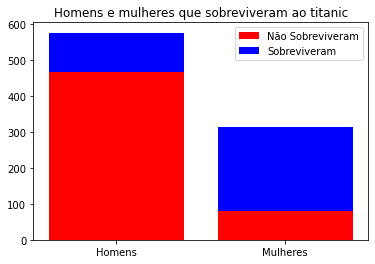

In [29]:
g1 = dadosTreino["Survived"][filtro].value_counts()
g2 = dadosTreino["Survived"][filtro2].value_counts()

homensNaoSobreviveram = g1[0]
homensSobreviveram = g1[1]
mulheresSobreviveram = g2[1]
mulheresNaoSobreviveram = g2[0]

index = ["Homens", "Mulheres"]

plt.bar(index, [homensNaoSobreviveram, mulheresNaoSobreviveram], color='red', label="Não Sobreviveram")
plt.bar(index, [homensSobreviveram, mulheresSobreviveram], bottom=[homensNaoSobreviveram, mulheresNaoSobreviveram],  color='blue', label="Sobreviveram")
plt.title("Homens e mulheres que sobreviveram ao titanic")
plt.legend(loc="upper right") #deve colocar o label na bar e, ai sim, chamar a função de legenda


Text(0.5, 1.0, 'Distribuição das pessoas por idade')

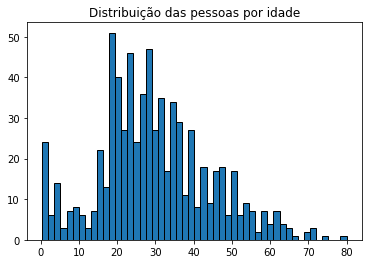

In [30]:
dadosTreino["Age"].hist(bins=50, grid=False, ec='black') #ec adiciona as linhas
plt.title("Distribuição das pessoas por idade")


In [31]:
dadosTreino["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

[80, 136]
[97, 87]
[372, 119]


Text(0, 0.5, 'Quantidade de pessoas')

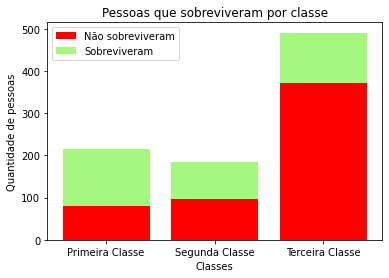

In [32]:
df= dadosTreino[["Survived", "Pclass"]]
primeiraClasse = [0, 0] #primeiro numero sao aqueles que nao sobreviveram e o segundo numero aqueles que sobreviveram
segundaClasse = [0,0] 
terceiraClasse = [0,0]

for i in range (0, len(df.index)): #len(df.index) é o jeito pra iterar cada linha do dataFrame
    if df.at[i, "Pclass"] == 1:
        if df.at[i,"Survived"] == 0:
            primeiraClasse[0] += 1;
        else:
            primeiraClasse[1] += 1;
    elif df.at[i, "Pclass"] == 2:
        if df.at[i,"Survived"] == 0:
            segundaClasse[0] += 1;
        else:
            segundaClasse[1] += 1;
    else:
        if df.at[i,"Survived"] == 0:
            terceiraClasse[0] += 1;
        else:
            terceiraClasse[1] += 1;
    
        
print(primeiraClasse)
print(segundaClasse)
print(terceiraClasse)

labels=["Primeira Classe", "Segunda Classe", "Terceira Classe"]

plt.bar(labels, [primeiraClasse[0], segundaClasse[0], terceiraClasse[0]], color='red', label="Não sobreviveram")
plt.bar(labels, [primeiraClasse[1], segundaClasse[1], terceiraClasse[1]], bottom=[primeiraClasse[0], segundaClasse[0], terceiraClasse[0]], color='#A6F780', label="Sobreviveram")
plt.legend(loc="upper left")
plt.title("Pessoas que sobreviveram por classe")
plt.xlabel("Classes")
plt.ylabel("Quantidade de pessoas")



In [33]:
df2 = pd.DataFrame({'nao sobreviveram':  [primeiraClasse[0], segundaClasse[0], terceiraClasse[0]], 
                    'sobreviveram': [primeiraClasse[1], segundaClasse[1], terceiraClasse[1]]}, index=labels)


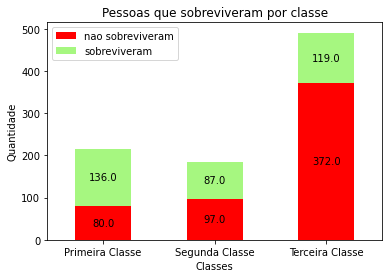

In [34]:
ax = df2.plot.bar(rot=0, stacked=True, color=['red', '#A6F780'], xlabel="Classes", ylabel="Quantidade")
plt.title("Pessoas que sobreviveram por classe")

#Código para colocar o texto no meio da tela
for c in ax.containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [v.get_height() if v.get_height() > 0 else '' for v in c]
    
    # remove the labels parameter if it's not needed for customized labels
    ax.bar_label(c, labels=labels, label_type='center')

In [35]:
print(dadosTreino.groupby(["Pclass", "Sex"]).Survived.mean())

#se for mulher da primeira classe teria 96% de chances de sobrevivência ao passo que homens na terceira classe teve 13%

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


In [36]:
df4 = dadosTreino[["Age", "Survived"]][(dadosTreino.Sex=='male') & (dadosTreino.Survived==1)]
df4.index
for i in df4.index: #estou imprimindo todos os index do DataFrame
    print(i)

17
21
23
36
55
65
74
78
81
97
107
125
127
146
165
183
187
193
204
207
209
220
224
226
248
261
267
271
283
286
288
298
301
305
338
340
348
370
390
391
400
407
414
429
430
444
445
447
449
453
455
460
484
489
507
509
510
512
543
547
549
550
553
569
570
572
579
587
599
604
607
621
622
630
632
643
645
647
660
664
673
679
681
690
692
701
707
709
712
724
737
740
744
751
755
762
788
802
803
804
821
827
828
831
838
839
857
869
889


In [37]:
df4 = dadosTreino[["Age", "Survived"]][(dadosTreino.Sex=='male') & (dadosTreino.Survived==1)]

bin = ['Homens', 0,0,0,0,0,0,0] #vou categorizar aqui os resultados de quantos homens sobreviveram por faixa de idade.
'''
bin[1] - menor de 10 anos
bin[2] - 11 a 20 anos
bin[3] - 21 a 30 anos
bin[4] - 31 a 40 anos
bin[5] - 41 a 50 anos
bin[6] - 51 a 60 anos
bin[7] - acima de 60 anos

'''

for i in df4.index: #len(df.index) é uma lista com todos os indexes
    if df4.at[i,"Age"] <= 10:
        bin[1] += 1
    elif 10 < df4.at[i,"Age"] <= 20:
        bin[2] += 1
    elif 20 < df4.at[i,"Age"] <= 30:
        bin[3] += 1
    elif 30 < df4.at[i,"Age"] <= 40:
        bin[4] += 1
    elif 40 < df4.at[i,"Age"] <= 50:
        bin[5] += 1
    elif 50 < df4.at[i,"Age"] <= 60:
        bin[6] += 1
    else:
        bin[7] += 1

print(bin)

df4_2 = dadosTreino[["Age", "Survived"]][(dadosTreino.Sex=='female') & (dadosTreino.Survived==1)]

bin_F = ['Mulheres',0,0,0,0,0,0,0] #vou categorizar aqui os resultados de quantos homens sobreviveram por faixa de idade.
'''
bin[1] - menor de 10 anos
bin[2] - 11 a 20 anos
bin[3] - 21 a 30 anos
bin[4] - 31 a 40 anos
bin[5] - 41 a 50 anos
bin[6] - 51 a 60 anos
bin[7] - acima de 60 anos

'''

for i in df4_2.index: #len(df.index) é uma lista com todos os indexes
    if df4_2.at[i,"Age"] <= 10:
        bin_F[1] += 1
    elif 10 < df4_2.at[i,"Age"] <= 20:
        bin_F[2] += 1
    elif 20 < df4_2.at[i,"Age"] <= 30:
        bin_F[3] += 1
    elif 30 < df4_2.at[i,"Age"] <= 40:
        bin_F[4] += 1
    elif 40 < df4_2.at[i,"Age"] <= 50:
        bin_F[5] += 1
    elif 50 < df4_2.at[i,"Age"] <= 60:
        bin_F[6] += 1
    else:
        bin_F[7] += 1

print(bin_F)
    
labelsHist = ["sexo", "menor de 10 anos", "11 a 20 anos", "21 a 30 anos", "31 a 40 anos", "41 a 50 anos", "51 a 60 anos", "acima de 60 anos"]




['Homens', 19, 10, 23, 23, 12, 4, 18]
['Mulheres', 19, 34, 61, 46, 21, 13, 39]


In [38]:
df5 = pd.DataFrame(data=[bin, bin_F], columns=labelsHist) #0 = sobreviventes homens, 1- sobreviventes mulheres
df5

,sexo,menor de 10 anos,11 a 20 anos,21 a 30 anos,31 a 40 anos,41 a 50 anos,51 a 60 anos,acima de 60 anos
0,Homens,19,10,23,23,12,4,18
1,Mulheres,19,34,61,46,21,13,39


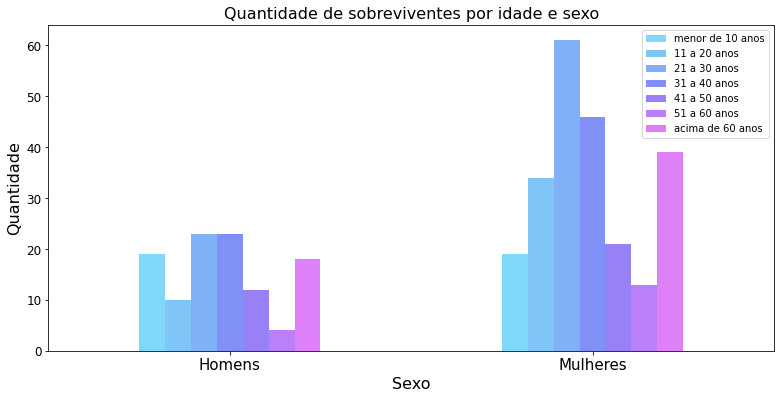

In [61]:
paletaCores = ["#80D7F7", "#80C5F7", "#80B1F7", "#8090F7", "#9880F7", "#BB80F7", "#DE80F7" ]

ax = df5.plot(kind="bar", title="Quantidade de sobreviventes por idade e sexo", figsize=(13,6), color=paletaCores)
ax.set_xlabel("Sexo", fontsize=16)
ax.set_ylabel("Quantidade", fontsize=16)

#mudando labels
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = "Homens"
labels[1] = "Mulheres"
ax.set_xticklabels(labels)

#mudando os parâmetros do meu gráfico (ticks sao os traços em cima do axis do gráfico. Em x é 'Homens' e 'Mulheres' e y é '0...60')
ax.tick_params(axis='x', labelsize=15, labelrotation=0)
ax.tick_params(axis='y', labelsize=12)

#alterando o tamanho do texto do titulo
ax.title.set_fontsize(16)



NameError: name 'item' is not defined

Index(['sexo', 'menor de 10 anos', '11 a 20 anos', '21 a 30 anos',
       '31 a 40 anos', '41 a 50 anos', '51 a 60 anos', 'acima de 60 anos'],
      dtype='object')